<a href="https://colab.research.google.com/github/Raymondgwangryeol/Raymondgwangryeol/blob/main/SVM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Linear SVM(서포트 벡터 머신)**

- **'이진'** 분류 모델 (비선형에서도 쓰일 수 있다!)
- 어느 카테고리가 어디에 속할까?

<br>
🤔 다음 그림에서 가장 적절한 구분선(Decision Boundary)은?

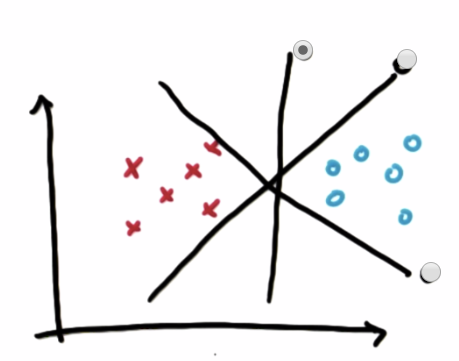







정답은 가운데!(표시되어 있음)

이유는? 가운데 선이 마진을 가장 최대화 하기 때문!!

물론 범주를 정확하게 나누면서 마진이 최대화 되야 함

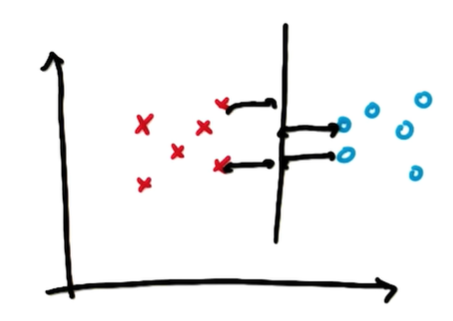

<h2><b>즉, SVM의 학습 방향은 Margin의 최대화</b></h2>
</br>
<b>근데 Margin이 뭔데?</b>
</br></br>
Margin이란, 선과 가장 가까운 양 옆 데이터와의 거리
<br>
즉, 마진은 구분선과 서포트 벡터(경계선에 가장 가까이 있는 각 클래스의 데이터)와의 거리를 의미
</br>

**Margin이 왜 최대화가 되어야 할까?**

새로운 data가 들어와도 강인한 분류가 가능!

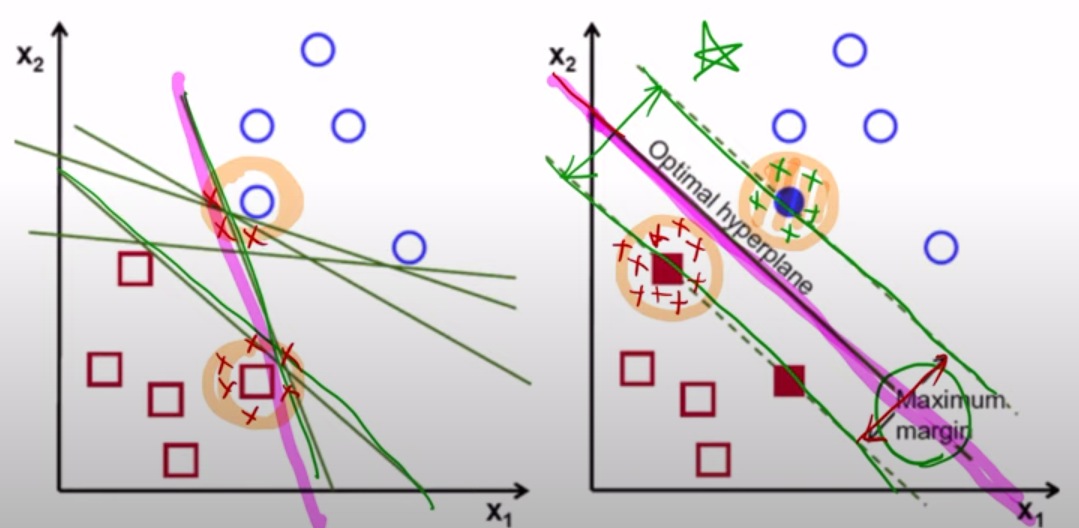

From 최유경 교수님 기계학습 강의교안

확실히 마진이 최대가 되어야 새로운 데이터가 들어와도 안정적인 구분이 가능할 확률이 높아지는 것을 볼 수 있다!

만약 이게 3차원 공간이라면?
<br>
경계선은 이보다 한 단계 낮은 차원이어야 함
<br>
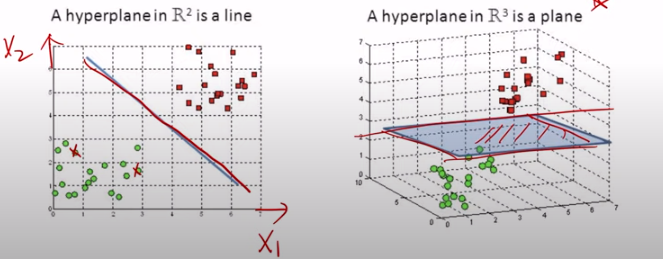

(아... 수학적 접근 너무 어렵다....ㅠㅠㅠ)



In [10]:
#종을 구분하는 건가보다

import seaborn as sns

#1. 원하는 카테고리를 불러온다.
iris=sns.load_dataset('iris') # iris data 불러오기
X=iris.drop('species',axis=1) # 특성변수만으로 구성된 X data Frame 생성
y=iris['species']             # 분류의 목적 변수만으로 구성된 y data Frame생성

#2.data Frame을 범주형 숫자로 치환한다.
from sklearn.preprocessing import LabelEncoder #범주형 변수 숫자로 치환하는 함수 호출
classle=LabelEncoder()
y=classle.fit_transform(iris['species'].values)#범주형 변수 숫자로 치환

#3.set 설정
from sklearn.model_selection import train_test_split #train set과 test set으로 데이터 나누기 위한 함수 호출
X_train,X_test,y_train,y_test=train_test_split(X,y, test_size=0.3, random_state=123, stratify=y)


"\nfrom sklearn.preprocessing import LabelEncoder #범주형 변수 숫자로 치환하는 함수 호출\nclassle=LabelEncoder()\ny=classle.fit_transform(iris['species'].values)#범주형 변수 숫자로 치환\n\nfrom sklearn.model_selection import train_test_split #train set과 test set으로 데이터 나누기 위한 함수 호출\nX_train,X_test,y_train,y_test=train_test_split(X,y, test_size=0.3, random_state=123, stratify=y)\n"

In [ ]:
from sklearn.svm import SVC #SVM함수의 호출
svm=SVC(kernel='linear',C=1.0,random_state=1) #C=오류를 어느정도 허용하는가?(오버 피팅, 언더 피팅과 관련) -> http://hleecaster.com/ml-svm-concept/ 참고
#C 기본값은 1임
#C값이 클수록 하드마진(오류 허용 안 함), 작을수록 소프트마진(오류를 허용함)
svm.fit(X_train,y_train) #SVM추정
y_train_pred=svm.predict(X_train) #train set의 y 예측치 구하기
y_test_pred=svm.predict(X_test)  #test set의 y예측치 구하기

In [ ]:
#서포트 벡터 확인하기
print(svm.support_)
print(svm.n_support_)

[ 21  43 101   8  23  33  38  42  54  58  76  82  85   5  10  19  27  41
  59  60  95]
[ 3 10  8]


In [ ]:
from sklearn import metrics
print(metrics.accuracy_score(y_train,y_train_pred))  # train set의 accuracy ratio
print(metrics.accuracy_score(y_test,y_test_pred))   # test set의 accuracy ratio

0.9904761904761905
0.9777777777777777


In [ ]:
metrics.confusion_matrix(y_test,y_test_pred)  #confusion_matrix

array([[15,  0,  0],
       [ 0, 14,  1],
       [ 0,  0, 15]])

In [ ]:
from sklearn import metrics
print(metrics.classification_report(y_test,y_test_pred))   #classification_report

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       1.00      0.93      0.97        15
           2       0.94      1.00      0.97        15

    accuracy                           0.98        45
   macro avg       0.98      0.98      0.98        45
weighted avg       0.98      0.98      0.98        45



이런 경우는 어떻게 해야 해요..?
</br>
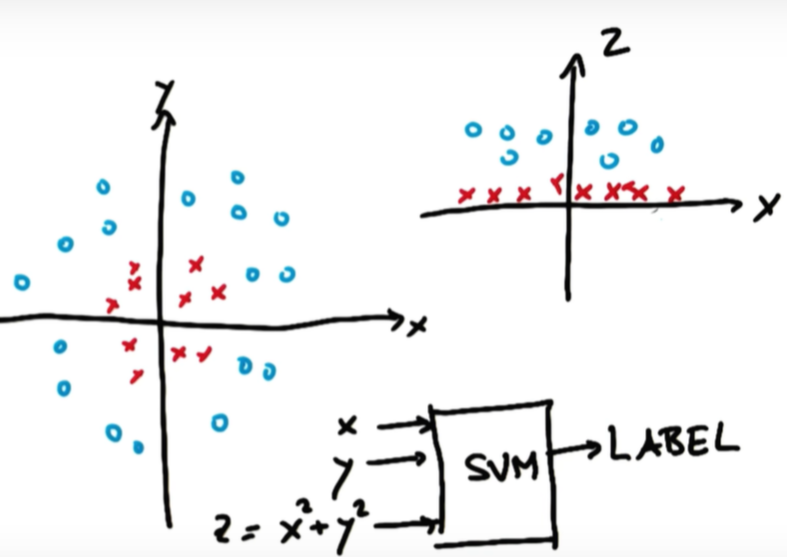

kernel을 이용하면 구분할 수 있다!
<br>
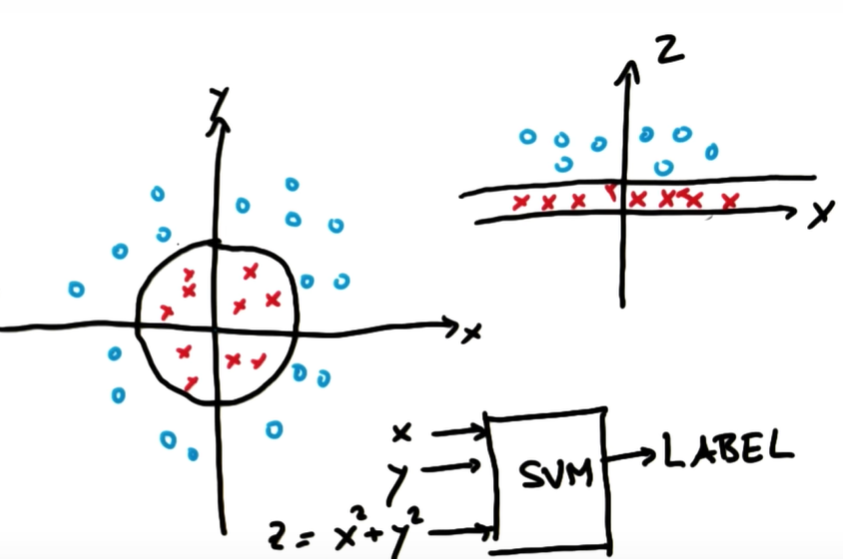

 x, y로만 이루어진 평면을 x, y, z 평면으로 차원 확대를 하니 구분선을 쉽게 그릴 수 있었다. 이렇듯 저차원 공간(low dimensional space)을 고차원 공간(high dimensional space)으로 매핑해주는 작업을 커널 트릭(Kernel Trick)이라고 한다.